<a href="https://colab.research.google.com/github/Gul0595/Gul0595/blob/main/Forage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

In [32]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set(style="whitegrid")

In [35]:
transactions = pd.read_excel(r'/content/QVI_transaction_data.xlsx')

In [36]:
customers = pd.read_csv(r'/content/QVI_purchase_behaviour.csv')

In [37]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [38]:
customers.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [39]:
transactions.shape

(264836, 8)

In [40]:
customers.shape

(72637, 3)

In [41]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [42]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [43]:
df =customers

In [44]:
df['LIFESTAGE'].value_counts()

,count
LIFESTAGE,
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


In [45]:
df['PREMIUM_CUSTOMER'].value_counts()

,count
PREMIUM_CUSTOMER,
Mainstream,29245
Budget,24470
Premium,18922


In [46]:
transactions.isnull().sum( )

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [47]:
customers.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [48]:
transactions.duplicated().sum()

np.int64(1)

In [49]:
customers.duplicated().sum()

np.int64(0)

In [50]:
transactions.drop_duplicates(inplace=True)

In [51]:
transactions.duplicated().sum()

np.int64(0)

In [52]:
transactions['PROD_QTY'].describe()

,PROD_QTY
count,264835.000000
mean,1.907308
std,0.643655
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,200.000000


In [53]:
transactions[transactions['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [54]:
transactions= transactions[transactions['PROD_QTY']< 200]

In [55]:
transactions['PROD_QTY'].max()

5

In [56]:
transactions['DATE']= pd.to_datetime(transactions['DATE'], unit='D', origin='1899-12-30')

In [57]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [59]:
transactions['DATE'].min()

Timestamp('2018-07-01 00:00:00')

In [60]:
transactions['DATE'].max()

Timestamp('2019-06-30 00:00:00')

In [61]:
transactions['PROD_NAME'].head(20)

,PROD_NAME
0,Natural Chip Compny SeaSalt175g
1,CCs Nacho Cheese 175g
2,Smiths Crinkle Cut Chips Chicken 170g
3,Smiths Chip Thinly S/Cream&Onion 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g
5,Old El Paso Salsa Dip Tomato Mild 300g
6,Smiths Crinkle Chips Salt & Vinegar 330g
7,Grain Waves Sweet Chilli 210g
8,Doritos Corn Chip Mexican Jalapeno 150g
9,Grain Waves Sour Cream&Chives 210G


In [62]:
transactions['PROD_NAME'].nunique()

114

In [64]:
transactions['PROD_NAME'].str.contains('dips|nuts|cracker|popcorn', case=False).sum()

np.int64(3174)

In [67]:
transactions[transactions['PROD_NAME'].str.contains('dips|salsa', case=False)].head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
71,2018-08-15,94,94233,93956,65,Old El Paso Salsa Dip Chnky Tom Ht300g,1,5.1
74,2018-08-16,97,97159,97271,35,Woolworths Mild Salsa 300g,5,7.5
87,2018-08-15,116,116184,120270,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
114,2018-08-16,157,157185,159562,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2
131,2018-08-19,175,175306,176634,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1


In [68]:
transactions=transactions[~transactions['PROD_NAME'].str.contains('Salsa Dip', case=False)]

In [71]:
transactions['PROD_NAME'].str.contains('Salsa Dip', case=False).sum()

np.int64(0)

In [72]:
transactions['PACK_SIZE']= transactions['PROD_NAME'].str.extract(r'(\d+)[gG]',expand=False)

In [73]:
transactions['PACK_SIZE']=transactions['PACK_SIZE'].astype(int)

In [76]:
transactions[['PROD_NAME', 'PACK_SIZE']].head(10)

,PROD_NAME,PACK_SIZE
0,Natural Chip Compny SeaSalt175g,175
1,CCs Nacho Cheese 175g,175
2,Smiths Crinkle Cut Chips Chicken 170g,170
3,Smiths Chip Thinly S/Cream&Onion 175g,175
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150
5,Old El Paso Salsa Dip Tomato Mild 300g,300
6,Smiths Crinkle Chips Salt & Vinegar 330g,330
7,Grain Waves Sweet Chilli 210g,210
8,Doritos Corn Chip Mexican Jalapeno 150g,150
9,Grain Waves Sour Cream&Chives 210G,210


In [78]:
transactions['BRAND']= transactions['PROD_NAME'].str.split().str[0]

In [80]:
transactions[['PROD_NAME', 'BRAND']].head(10)

,PROD_NAME,BRAND
0,Natural Chip Compny SeaSalt175g,Natural
1,CCs Nacho Cheese 175g,CCs
2,Smiths Crinkle Cut Chips Chicken 170g,Smiths
3,Smiths Chip Thinly S/Cream&Onion 175g,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle
5,Old El Paso Salsa Dip Tomato Mild 300g,Old
6,Smiths Crinkle Chips Salt & Vinegar 330g,Smiths
7,Grain Waves Sweet Chilli 210g,Grain
8,Doritos Corn Chip Mexican Jalapeno 150g,Doritos
9,Grain Waves Sour Cream&Chives 210G,Grain


In [81]:
transactions['BRAND'].value_counts()

,count
BRAND,
Kettle,41288
Smiths,28859
Pringles,25102
Doritos,24962
Thins,14075
RRD,11894
Infuzions,11057
WW,10320
Cobs,9693


In [82]:
transactions['BRAND'] = transactions['BRAND'].replace({
    'Old': 'Old El Paso',
    'Grain': 'Grain Waves',
    'GrnWves': 'Grain Waves',
    'Natural': 'Natural Chip Co',
    'NCC': 'Natural Chip Co',
    'Red': 'Red Rock Deli',
    'WW': 'Woolworths',
    'Dorito': 'Doritos',
    'Smith': 'Smiths',
    'Infzns': 'Infuzions',
    'Snbts': 'Sunbites',
    'Burger': 'Burger Rings'
})

In [83]:
transactions['BRAND'].value_counts()

,count
BRAND,
Kettle,41288
Smiths,31822
Doritos,28145
Pringles,25102
Woolworths,14757
Infuzions,14201
Thins,14075
RRD,11894
Cobs,9693


In [84]:
transactions = transactions.merge(customers, on='LYLTY_CARD_NBR', how='left')

In [86]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
transactions.shape()

In [ ]:
#DATA PREPARATION IS DONE-- NOW MOVING TO DATA ANALYSIS AND CUSTOMER SEGMENTATION

In [87]:
transactions['CALC_SALES']=transactions['PROD_QTY']*(transactions['TOT_SALES']/transactions['PROD_QTY'])

In [88]:
transactions['TOT_SALES'].sum()

np.float64(1933108.9999999998)

In [90]:
sales_by_lifestage= transactions.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)

In [91]:
sales_by_lifestage

,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,402420.75
RETIREES,366470.90
OLDER FAMILIES,352467.20
YOUNG FAMILIES,316160.10
YOUNG SINGLES/COUPLES,260405.30
MIDAGE SINGLES/COUPLES,184751.30
NEW FAMILIES,50433.45


In [92]:
sales_by_premium= transactions.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

In [93]:
sales_by_premium

,TOT_SALES
PREMIUM_CUSTOMER,
Budget,676211.55
Mainstream,750744.50
Premium,506152.95


In [94]:
segment_sales= transactions.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False)

In [95]:
segment_sales

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              168363.25
YOUNG SINGLES/COUPLES   Mainstream          157621.60
RETIREES                Mainstream          155677.05
YOUNG FAMILIES          Budget              139345.85
OLDER SINGLES/COUPLES   Budget              136769.80
                        Mainstream          133393.80
                        Premium             132257.15
RETIREES                Budget              113147.80
OLDER FAMILIES          Mainstream          103445.55
RETIREES                Premium              97646.05
YOUNG FAMILIES          Mainstream           92788.75
MIDAGE SINGLES/COUPLES  Mainstream           90803.85
YOUNG FAMILIES          Premium              84025.50
OLDER FAMILIES          Premium              80658.40
YOUNG SINGLES/COUPLES   Budget               61141.60
MIDAGE SINGLES/COUPLES  Premium              58432.65
YOUNG SINGLES/COUPLES   Premium              41642.10
MIDAGE SINGLES/COUPLES  Budget               35514.80
NEW FAMILIES            Budget               21928.45
                        Mainstream           17013.90
                        Premium              11491.10
Name: TOT_SALES, dtype: float64

In [96]:
customers_per_segment = transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False)
customers_per_segment

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          8088
RETIREES                Mainstream          6479
OLDER SINGLES/COUPLES   Mainstream          4930
                        Budget              4929
                        Premium             4750
OLDER FAMILIES          Budget              4675
RETIREES                Budget              4454
YOUNG FAMILIES          Budget              4017
RETIREES                Premium             3872
YOUNG SINGLES/COUPLES   Budget              3779
MIDAGE SINGLES/COUPLES  Mainstream          3340
OLDER FAMILIES          Mainstream          2831
YOUNG FAMILIES          Mainstream          2728
YOUNG SINGLES/COUPLES   Premium             2574
YOUNG FAMILIES          Premium             2433
MIDAGE SINGLES/COUPLES  Premium             2431
OLDER FAMILIES          Premium             2273
MIDAGE SINGLES/COUPLES  Budget              1504
NEW FAMILIES            Budget              1112
                        Mainstream           849
                        Premium              588
Name: LYLTY_CARD_NBR, dtype: int64

In [97]:
avg_sales_per_customer = (
  transactions.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()/transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
).sort_values(ascending=False)
avg_sales_per_customer


LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          36.540286
                        Budget              36.013529
                        Premium             35.485438
YOUNG FAMILIES          Budget              34.689034
                        Premium             34.535758
                        Mainstream          34.013471
OLDER SINGLES/COUPLES   Premium             27.843611
                        Budget              27.747981
MIDAGE SINGLES/COUPLES  Mainstream          27.186781
OLDER SINGLES/COUPLES   Mainstream          27.057566
RETIREES                Budget              25.403637
                        Premium             25.218505
MIDAGE SINGLES/COUPLES  Premium             24.036466
RETIREES                Mainstream          24.027944
MIDAGE SINGLES/COUPLES  Budget              23.613564
NEW FAMILIES            Mainstream          20.039929
                        Budget              19.719829
                        Premium             19.542687
YOUNG SINGLES/COUPLES   Mainstream          19.488328
                        Budget              16.179307
                        Premium             16.177972
dtype: float64

In [98]:
avg_qty = transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].mean().sort_values(ascending=False)
avg_qty

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          1.948610
                        Budget              1.945812
                        Premium             1.945576
YOUNG FAMILIES          Budget              1.940749
                        Mainstream          1.940342
                        Premium             1.937732
OLDER SINGLES/COUPLES   Premium             1.914268
                        Budget              1.913403
MIDAGE SINGLES/COUPLES  Mainstream          1.911656
OLDER SINGLES/COUPLES   Mainstream          1.910525
RETIREES                Premium             1.900122
                        Budget              1.892244
MIDAGE SINGLES/COUPLES  Budget              1.891633
                        Premium             1.889727
RETIREES                Mainstream          1.887543
NEW FAMILIES            Premium             1.860919
                        Mainstream          1.857634
                        Budget              1.853910
YOUNG SINGLES/COUPLES   Mainstream          1.852498
                        Premium             1.804012
                        Budget              1.803830
Name: PROD_QTY, dtype: float64

In [99]:
avg_pack_size = transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PACK_SIZE'].mean().sort_values(ascending=False)
avg_pack_size

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          184.828330
MIDAGE SINGLES/COUPLES  Mainstream          184.582786
OLDER SINGLES/COUPLES   Premium             183.254999
RETIREES                Premium             182.975260
                        Budget              182.960200
YOUNG FAMILIES          Budget              182.490901
OLDER FAMILIES          Budget              182.487219
OLDER SINGLES/COUPLES   Budget              182.289183
RETIREES                Mainstream          182.289062
OLDER FAMILIES          Mainstream          182.175021
NEW FAMILIES            Mainstream          181.699355
OLDER SINGLES/COUPLES   Mainstream          181.642101
MIDAGE SINGLES/COUPLES  Premium             181.577897
YOUNG FAMILIES          Mainstream          181.536531
OLDER FAMILIES          Premium             181.432618
YOUNG FAMILIES          Premium             181.351985
NEW FAMILIES            Premium             181.286973
                        Budget              181.161730
YOUNG SINGLES/COUPLES   Premium             181.056042
                        Budget              180.694438
MIDAGE SINGLES/COUPLES  Budget              180.187450
Name: PACK_SIZE, dtype: float64

In [100]:
transactions_per_customer = (
    transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TXN_ID'].count() /
    transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
).sort_values(ascending=False)

transactions_per_customer

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          5.031438
                        Budget              4.954011
                        Premium             4.923009
YOUNG FAMILIES          Budget              4.760269
                        Premium             4.752569
                        Mainstream          4.731305
OLDER SINGLES/COUPLES   Premium             3.737474
                        Budget              3.734429
                        Mainstream          3.715619
MIDAGE SINGLES/COUPLES  Mainstream          3.555090
RETIREES                Budget              3.412887
                        Premium             3.382231
MIDAGE SINGLES/COUPLES  Premium             3.379679
                        Budget              3.337766
RETIREES                Mainstream          3.313166
NEW FAMILIES            Mainstream          2.738516
                        Premium             2.702381
                        Budget              2.702338
YOUNG SINGLES/COUPLES   Mainstream          2.578388
                        Budget              2.445621
                        Premium             2.440171
dtype: float64

In [104]:
older_families = transactions[transactions['LIFESTAGE'] == 'OLDER FAMILIES']

In [105]:
brand_sales_older = (
    older_families.groupby('BRAND')['TOT_SALES']
    .sum()
    .sort_values(ascending=False)
)

brand_sales_older.head(10)

,TOT_SALES
BRAND,
Kettle,65984.0
Smiths,45097.5
Doritos,41822.9
Pringles,30584.2
Infuzions,17560.8
Thins,15909.3
Old El Paso,15804.9
RRD,14771.1
Twisties,14456.5


In [106]:
young_singles = transactions[transactions['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']

brand_sales_young = (
    young_singles.groupby('BRAND')['TOT_SALES']
    .sum()
    .sort_values(ascending=False)
)

brand_sales_young.head(10)

,TOT_SALES
BRAND,
Kettle,54241.0
Doritos,33659.3
Smiths,28179.5
Pringles,25296.9
Infuzions,13793.0
Old El Paso,12444.0
Thins,12045.0
Twisties,11653.7
Tostitos,11149.6


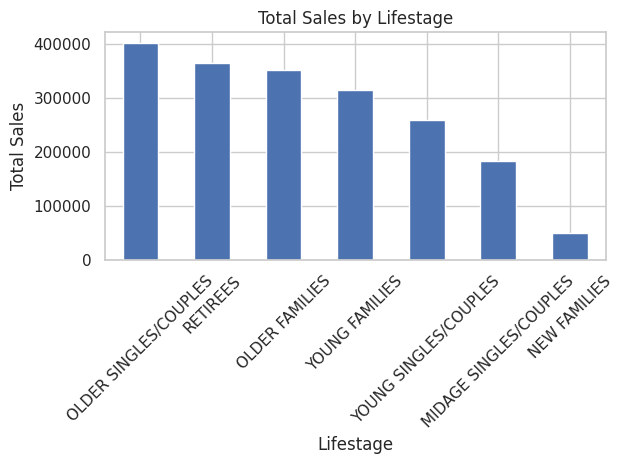

In [107]:
sales_by_lifestage = (
    transactions.groupby('LIFESTAGE')['TOT_SALES']
    .sum()
    .sort_values(ascending=False)
)

plt.figure()
sales_by_lifestage.plot(kind='bar')
plt.title("Total Sales by Lifestage")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

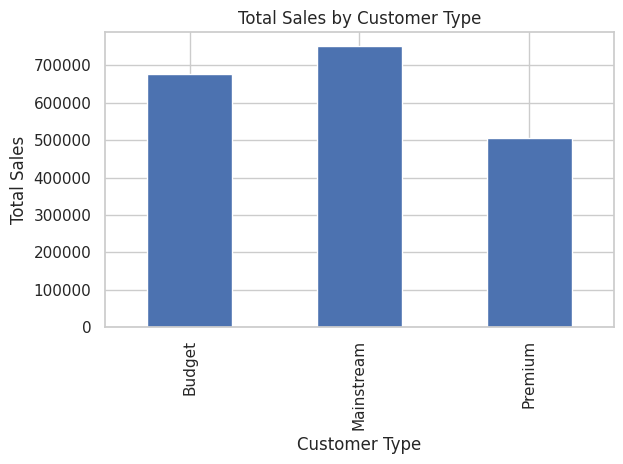

In [108]:
sales_by_premium = (
    transactions.groupby('PREMIUM_CUSTOMER')['TOT_SALES']
    .sum()
)

plt.figure()
sales_by_premium.plot(kind='bar')
plt.title("Total Sales by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

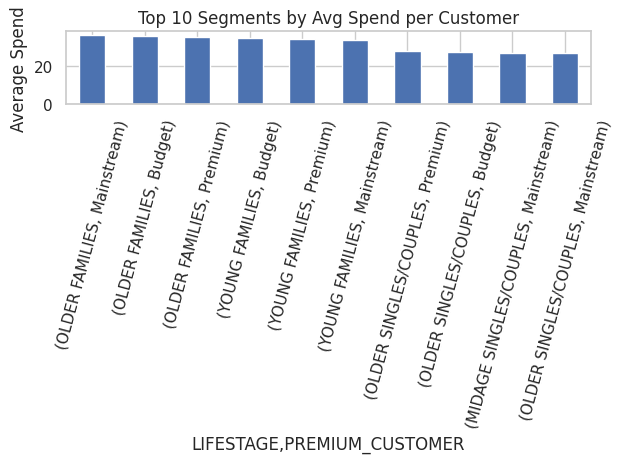

In [109]:
avg_spend = (
    transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum() /
    transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
)

avg_spend = avg_spend.sort_values(ascending=False).head(10)

plt.figure()
avg_spend.plot(kind='bar')
plt.title("Top 10 Segments by Avg Spend per Customer")
plt.ylabel("Average Spend")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

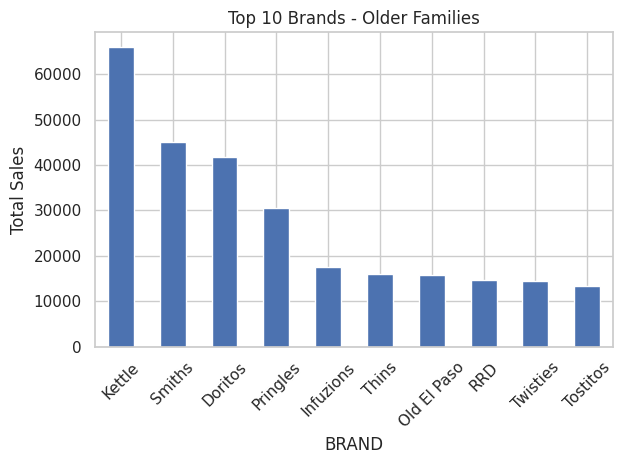

In [110]:
brand_sales_older = (
    older_families.groupby('BRAND')['TOT_SALES']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
brand_sales_older.plot(kind='bar')
plt.title("Top 10 Brands - Older Families")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

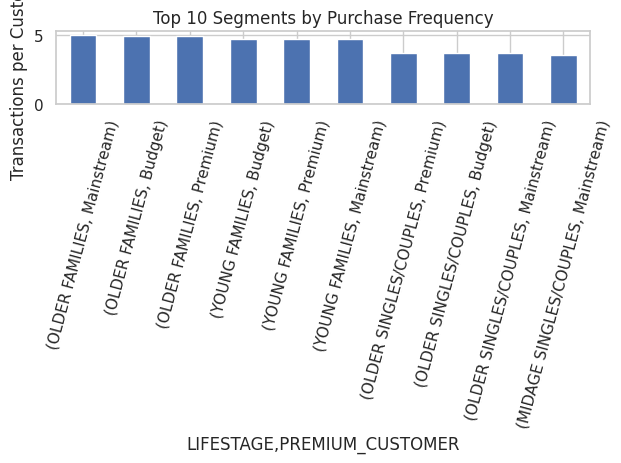

In [111]:
transactions_per_customer = (
    transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TXN_ID'].count() /
    transactions.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
)

transactions_per_customer = transactions_per_customer.sort_values(ascending=False).head(10)

plt.figure()
transactions_per_customer.plot(kind='bar')
plt.title("Top 10 Segments by Purchase Frequency")
plt.ylabel("Transactions per Customer")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()